In [12]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
labeled_images = pd.read_csv('data/train.csv') # load data
images = labeled_images.iloc[0:5000,1:] # limit to 5000
labels = labeled_images.iloc[0:5000,:1] # limit to 5000

In [8]:
# create training and test sets for images and labels
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=.2)

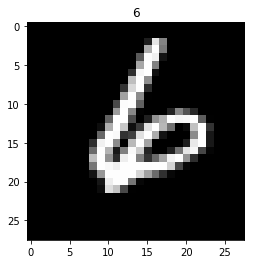

In [24]:
# View an image from the training set
i = 34
img = train_images.iloc[i].values
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title(train_labels.iloc[i, 0]);

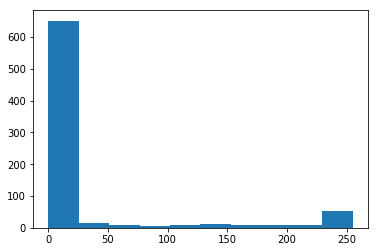

In [28]:
# View a histogram of the pixel values/colors. 0 is black.
plt.hist(train_images.iloc[34]);

In [29]:
# Train the model using a vector classifier

clf = svm.SVC()

clf.fit(train_images, train_labels.values.ravel()) # Fit the model
clf.score(test_images, test_labels)

0.073

In [30]:
# That's horrible accuracy, so we're going to use other methods.

In [35]:
test_images[test_images > 0] = 1 # This sets all non-black pixels to white
train_images[train_images > 0] = 1

/Users/gabrielestes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gabrielestes/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/gabrielestes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

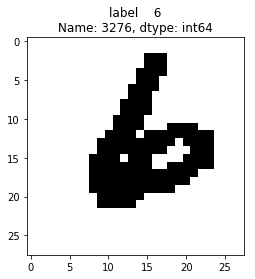

In [39]:
# View image
img = train_images.iloc[i].values.reshape((28,28))
plt.imshow(img, cmap = 'binary')
plt.title(train_labels.iloc[i]);

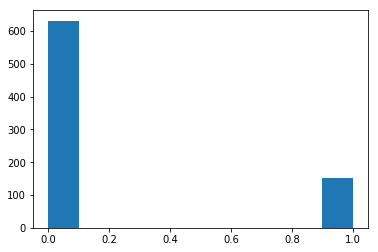

In [43]:
plt.hist(train_images.iloc[i]);
# 0 is black; 1 is white.

In [44]:
# Train the model again, now that we've simplified the data set

In [45]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.905

In [46]:
# Much better accuracy!

In [53]:
test_data = pd.read_csv('data/test.csv')
test_data[test_data > 0] = 1
results = clf.predict(test_data[0:28000])

In [54]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [55]:
df = pd.DataFrame(results)
df.index.name = 'ImageID'
df.index += 1
df.columns = ['Label']
df.to_csv('results.csv')